In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

DIR = "/notebooks/Thesis/results/aug6_bestAccuracy/"

names = []
metrics = []
alltargs = []
allpreds = []
normtargs = []
normpreds = []
crashtargs = []
crashpreds = []
for root, dirs, files in os.walk(DIR):
    for file in files:
        if file.endswith(".csv"):
            path = os.path.join(root, file)
            df = pd.read_csv(path, names=['frame', 'xtl', 'ytl', 'target', 'prediction'])
            targs = df['target']
            preds = df['prediction']

            if len(targs) == 0:
                continue

            alltargs += targs.values.tolist()
            allpreds += preds.values.tolist()

            if "Normal" in file:
                normtargs += targs.values.tolist()
                normpreds += preds.values.tolist()
            else:
                crashtargs += targs.values.tolist()
                crashpreds += preds.values.tolist()               

            acc = accuracy_score(targs, preds)
            prec = precision_score(targs, preds, zero_division=1)
            recall = recall_score(targs, preds, zero_division=1)
            f1 = f1_score(targs, preds, zero_division=1)

            # names.append()
            metrics.append([file[:-4], acc, prec, recall, f1])

metricsDF = pd.DataFrame(metrics)
print(metricsDF)

                            0         1         2         3         4
0        Z52L6jGdSkY13_437358  0.879310  0.343173  0.444976  0.387500
1        oopO9qXFlws01_436887  0.798318  0.238683  0.211101  0.224046
2        6mVcTFd5TzI28_436006  1.000000  1.000000  1.000000  1.000000
3        Xe9CoVqpv9c01_437175  0.628858  0.117943  0.753823  0.203972
4        3p_-1RjvCmw02_435955  0.456745  0.028480  0.767677  0.054923
5        ALFF5620ljk02_436101  0.786347  0.103718  0.304598  0.154745
6        bSZkOI7eF8k20_436238  0.528871  0.120038  0.748328  0.206889
7        1XIS9UOwC_Y06_435927  0.790099  0.369110  0.327907  0.347291
8    Normal_Videos_903_x264_1  1.000000  1.000000  1.000000  1.000000
9        NCmlbDaj-uE12_436762  0.556452  0.250000  1.000000  0.400000
10       6mVcTFd5TzI04_435981  0.785714  1.000000  0.000000  0.000000
11   Normal_Videos_902_x264_5  1.000000  1.000000  1.000000  1.000000
12       651RQwxB3WA13_436052  0.168831  1.000000  0.000000  0.000000
13   Normal_Videos_9

In [5]:
print("All Accuracy, Precision, Recall, and F1 Score")
print(accuracy_score(alltargs, allpreds), 
      precision_score(alltargs, allpreds), 
      recall_score(alltargs, allpreds), 
      f1_score(alltargs, allpreds))
print("Normal Accuracy, Precision, Recall, and F1 Score")
print(accuracy_score(normtargs, normpreds), 
      precision_score(normtargs, normpreds), 
      recall_score(normtargs, normpreds), 
      f1_score(normtargs, normpreds))
print("Crash Accuracy, Precision, Recall, and F1 Score")
print(accuracy_score(crashtargs, crashpreds),
      precision_score(crashtargs, crashpreds),
      recall_score(crashtargs, crashpreds), 
      f1_score(crashtargs, crashpreds))

All Accuracy, Precision, Recall, and F1 Score
0.6790225387160214 0.16774079005770084 0.50924378806662 0.2523571676593926
Normal Accuracy, Precision, Recall, and F1 Score
1.0 0.0 0.0 0.0
Crash Accuracy, Precision, Recall, and F1 Score


/conda/envs/data-science-stack-2.11.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/conda/envs/data-science-stack-2.11.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/conda/envs/data-science-stack-2.11.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(re

0.6521063653933394 0.16774079005770084 0.50924378806662 0.2523571676593926


In [6]:
print(len(crashtargs), len(crashpreds))

160917 160917


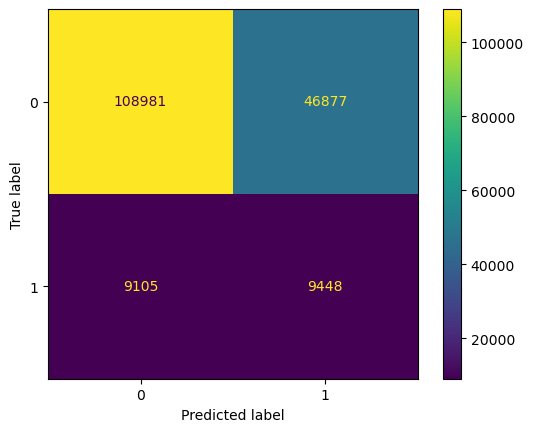

In [7]:
cm = confusion_matrix(alltargs, allpreds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

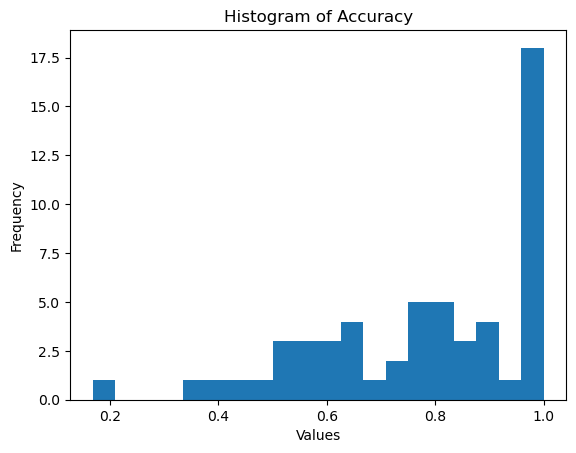

In [13]:
plt.hist(metricsDF[1].to_numpy(), bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Accuracy')
plt.show()

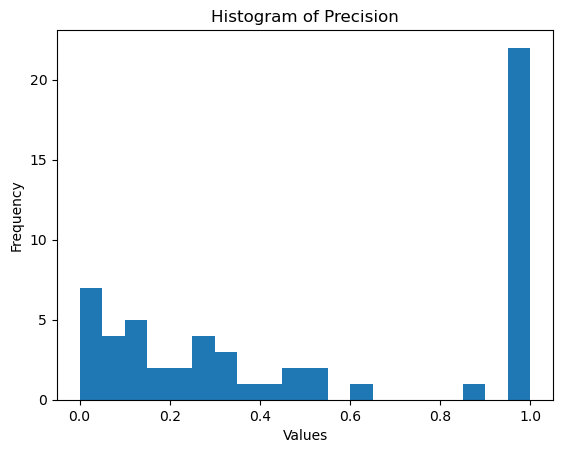

In [10]:
plt.hist(metricsDF[2].to_numpy(), bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Precision')
plt.show()

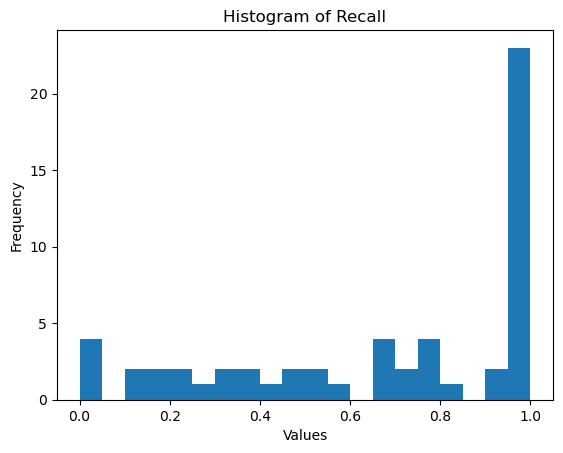

In [11]:
plt.hist(metricsDF[3].to_numpy(), bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Recall')
plt.show()

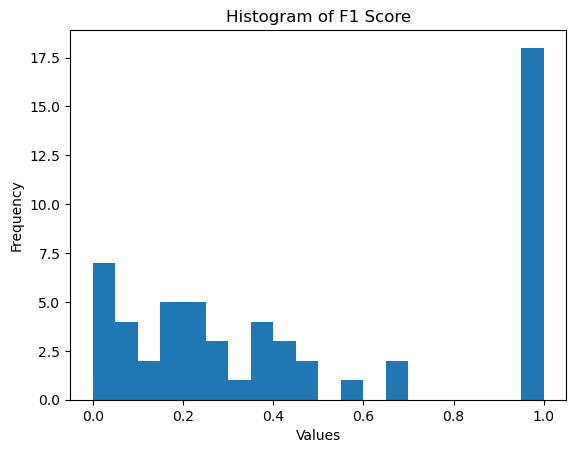

In [12]:
plt.hist(metricsDF[4].to_numpy(), bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of F1 Score')
plt.show()